***Hypothesis Generation***<br>
The data talks about the sales of item outlet there can be many features affecting it.<br><br>
**where the item is being sold**: i think is one of the features of course the location where the item is sold<br><br>
**item weight:** as it decreases the sales increases as most of technologies or anything aim to reduce weight<br><br>
**when was the item first introduced to the market:** The older it's the the more it sells except if it's much old<br><br>
**incase the item is food**<br><br>
**amount of calories**: most people nowadays tend to eat food with low calories




**Loading Packages and Data**




In [1016]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from mlxtend.preprocessing import minmax_scaling
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df=pd.read_csv("Train.csv")
test=pd.read_csv("Test.csv")

In [1017]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


**Data structure**

In [1018]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


**Exploratory Data Analysis**

In [1019]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


Looks like Item_MRP is the most important feature. it's directly proportional to the item outlet sales<br>
Item_Visibility is 0 in some rows eventhough it has sales. maybe we can identify 0 as null here


In [1020]:
len(df[df['Item_Visibility'] == 0])

526

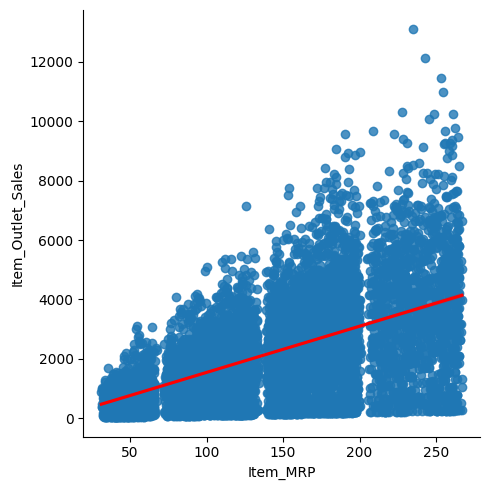

In [1021]:
sns.lmplot(x='Item_MRP',y='Item_Outlet_Sales',data=df,line_kws={'color': 'red'})

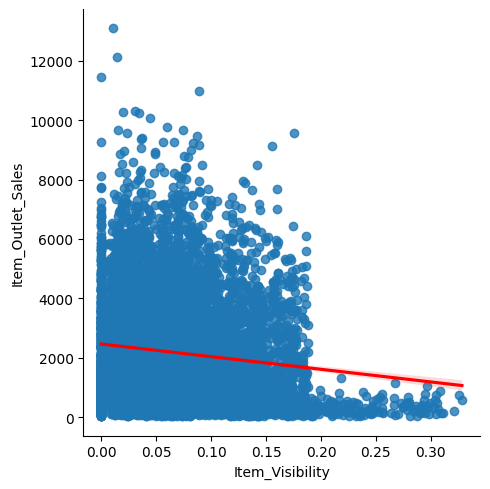

In [1022]:
sns.lmplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df,line_kws={'color': 'red'})

In [1023]:
categorycol=[c for c in df.columns if df[c].dtype=='object']
numcol=[c for c in df.columns if df[c].dtype!='object']
for c in categorycol:
  print(c,'unique values :',df[c].unique())


Item_Identifier unique values : ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content unique values : ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type unique values : ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier unique values : ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size unique values : ['Medium' nan 'High' 'Small']
Outlet_Location_Type unique values : ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type unique values : ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


Item_Fat_Content has the same category repeated 3 times but with abbreviation and another repeated 2 times.let's deal with it<br>
Item_Identifier has alot of unique values we will deal with it when we know how much does it contribute to target value

In [1024]:
df['Item_Fat_Content'].replace(['Low Fat', 'low fat'], 'LF', inplace=True)
df['Item_Fat_Content'].replace(['Regular'], 'reg', inplace=True)
test['Item_Fat_Content'].replace(['Low Fat', 'low fat'], 'LF', inplace=True)
test['Item_Fat_Content'].replace(['Regular'], 'reg', inplace=True)


In [1025]:
df.Item_Fat_Content.unique() #check
categorycol=[c for c in df.columns if df[c].dtype=='object']
numcol=[c for c in df.columns if df[c].dtype!='object']
for c in categorycol:
  print(c,'unique values :',df[c].unique())

Item_Identifier unique values : ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content unique values : ['LF' 'reg']
Item_Type unique values : ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier unique values : ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size unique values : ['Medium' nan 'High' 'Small']
Outlet_Location_Type unique values : ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type unique values : ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [1026]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

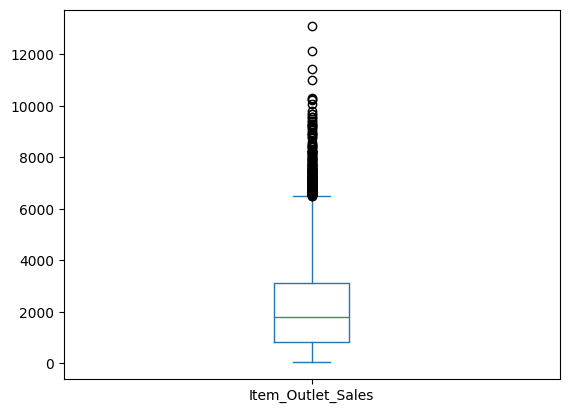

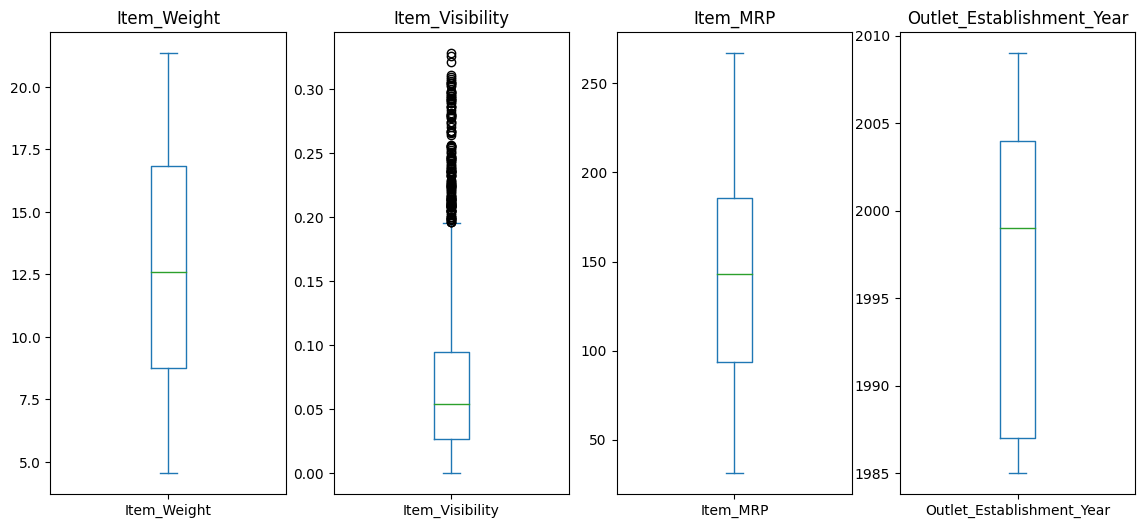

In [1027]:
x=df
x1=df
fig, ax = plt.subplots()
df['Item_Outlet_Sales'].plot.box(ax=ax)
y=x1.Item_Outlet_Sales
x1=x1.drop("Item_Outlet_Sales",axis=1)
numcol=[c for c in x1.columns if x1[c].dtype!='object']
data=x1[numcol]
fig, ax = plt.subplots(ncols=len(data.columns),figsize=(14,6))
for i,c in enumerate(data.columns):
    data[c].plot.box(ax=ax[i])
    ax[i].set_title(c)
plt.show()

Alot of null values lets explore the outliers too

alot of outliers in item_visibility and target values we will erase some in the item_visibility but not all because they are alot so if we erased all of them we will damage the data

In [1028]:
Q1 = x.Item_Outlet_Sales.quantile(0.25)
Q3 = x.Item_Outlet_Sales.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
x = x[(x.Item_Outlet_Sales >= lower_bound) & (x.Item_Outlet_Sales <= upper_bound)]

In [1029]:
x.Item_Outlet_Sales.describe()

count    8337.000000
mean     2059.362844
std      1506.099754
min        33.290000
25%       810.944400
50%      1747.059200
75%      2998.097400
max      6478.234000
Name: Item_Outlet_Sales, dtype: float64

In [1030]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,LF,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,reg,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,LF,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,reg,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


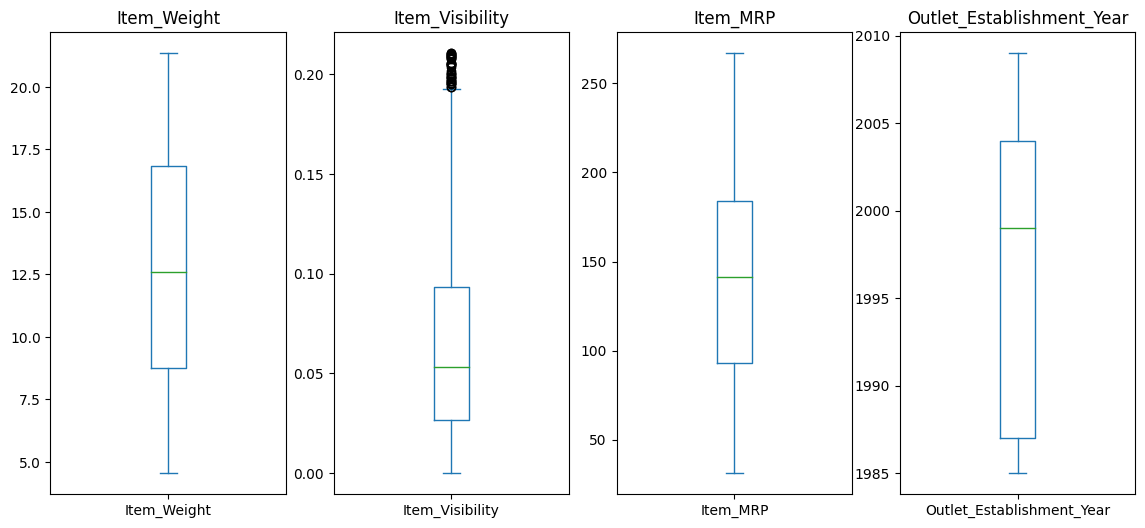

In [1031]:
z=abs((data-data.mean())/data.std())  #dealing with outliers with the Zscore method
x_outliers=data[(z>=2.8).any(axis=1)].index # fine tuning the threshhold till it remove an amount of outliers which improve accuracy
x=x.drop(index=x_outliers)
data=x[numcol]
fig, ax = plt.subplots(ncols=len(data.columns),figsize=(14,6))
for i,c in enumerate(data.columns):
    data[c].plot.box(ax=ax[i])
    ax[i].set_title(c)
plt.show()

In [1032]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,LF,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,reg,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,LF,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,reg,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


**Dealing with missing values**

In [1033]:
x=x.fillna(method='bfill',axis=0).fillna(method='ffill',axis=0)
x.isnull().sum()
test=test.fillna(method='bfill',axis=0).fillna(method='ffill',axis=0)

In [1034]:
x['Item_Visibility'] = x['Item_Visibility'].bfill().fillna(0)
x2=x

In [1035]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,High,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,LF,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,reg,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,LF,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,reg,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


**Scaling**

In [1036]:
numcol=[c for c in x.columns if (x[c].dtype!='object' and c!='Item_Outlet_Sales')]
x[numcol] = minmax_scaling(x[numcol] ,columns=numcol)

In [1037]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,0.282525,LF,0.076199,Dairy,0.927507,OUT049,0.583333,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,0.081274,reg,0.091541,Soft Drinks,0.072068,OUT018,1.000000,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,0.770765,LF,0.079584,Meat,0.468288,OUT049,0.583333,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,0.871986,reg,0.000000,Fruits and Vegetables,0.640093,OUT010,0.541667,High,Tier 3,Grocery Store,732.3800
4,NCD19,0.260494,LF,0.000000,Household,0.095805,OUT013,0.083333,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,0.137541,LF,0.269631,Snack Foods,0.777729,OUT013,0.083333,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,0.227746,reg,0.223092,Baking Goods,0.326263,OUT045,0.708333,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,0.359929,LF,0.167079,Health and Hygiene,0.228492,OUT035,0.791667,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,0.158083,reg,0.689568,Snack Foods,0.304939,OUT018,1.000000,Medium,Tier 3,Supermarket Type2,1845.5976


**Encoding**<br>
Label encoding for categorical data > 10 unique values<br>
hot encoding for categorical data < 10 unique values<br>

In [1038]:
objcol=df.select_dtypes(include=['object'])

y=x.Item_Outlet_Sales
x=x.drop("Item_Outlet_Sales",axis=1)
x_train, x_valid, y_train, y_valid = train_test_split(x, y,train_size=0.8, test_size=0.2,random_state=0)

good_label_cols = [col for col in objcol if set(x_valid[col]).issubset(set(x_train[col]))]
bad_label_cols = list(set(objcol)-set(good_label_cols)) #badcols should be dropped to make valid ordinal encoding
x_train = x_train.drop(bad_label_cols, axis=1)
x_valid = x_valid.drop(bad_label_cols, axis=1)
test=test.drop(bad_label_cols,axis=1)
smallcol=[c for c in good_label_cols if len(x_train[c].unique())<10]
bigcol=[c for c in good_label_cols if len(x_train[c].unique())>=10]
ordinal_encoder = OrdinalEncoder()
x_train[bigcol] = ordinal_encoder.fit_transform(x_train[bigcol])
x_valid[bigcol] = ordinal_encoder.transform(x_valid[bigcol])
test[bigcol]=ordinal_encoder.fit_transform(test[bigcol])

In [1039]:
encode=OneHotEncoder(handle_unknown='ignore', sparse=False)
en_traincols=pd.DataFrame(encode.fit_transform(x_train[smallcol]))
en_validcols=pd.DataFrame(encode.transform(x_valid[smallcol]))
en_test=pd.DataFrame(encode.transform(test[smallcol]))
en_traincols.index=x_train.index
en_validcols.index=x_valid.index
en_test.index=test.index
x_train=x_train.drop(smallcol,axis=1)
x_valid=x_valid.drop(smallcol,axis=1)
test=test.drop(smallcol,axis=1)
en_traincols=pd.concat([x_train,en_traincols],axis=1)
en_validcols=pd.concat([x_valid,en_validcols],axis=1)
en_test=pd.concat([test,en_test],axis=1)
en_traincols.columns = en_traincols.columns.astype(str)
en_validcols.columns=en_validcols.columns.astype(str)
en_test.columns=en_test.columns.astype(str)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


as we can see Item_Identifier is dropped because it's a bad column and it looks like it doesn't affect the target value

**Modeling**

**Linear Regression**

In [1040]:
model1 = LinearRegression().fit(en_traincols, y_train)
preds = model1.predict(en_validcols)
print('MAE:', mean_absolute_error(y_valid, preds))
yrange=y_valid.max()-y_valid.min()
error=mean_absolute_error(y_valid, preds)
print('error percentage:',(error/yrange)*100)
MdAPE = np.median(np.abs((y_valid - preds) / y_valid)) * 100
accuracy = 100 - MdAPE

print('Accuracy:', accuracy)

MAE: 774.4940952035663
error percentage: 12.030751599846885
Accuracy: 66.88836508407631


**

**XGBoost**

In [1041]:
model=XGBRegressor(n_estimators=500, learning_rate=0.502,n_jobs=5)
model.fit(en_traincols,y_train ,early_stopping_rounds=3,eval_set=[(en_validcols, y_valid)], verbose=False)
preds = model.predict(en_validcols)
print('MAE:', mean_absolute_error(y_valid, preds))
MdAPE = np.median(np.abs((y_valid - preds) / y_valid)) * 100
accuracy = 100 - MdAPE

print('Accuracy:', accuracy)
rmse = np.sqrt(mean_squared_error(y_valid,preds))
print('rmse:',rmse)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


MAE: 718.9081931959417
Accuracy: 70.05724087820735
rmse: 995.7666311954041


**RandomForest**

In [1042]:
model2=RandomForestRegressor(n_estimators=80, random_state=0)
model2.fit(en_traincols, y_train)
preds = model2.predict(en_validcols)
print('MAE:', mean_absolute_error(y_valid, preds))
MdAPE = np.median(np.abs((y_valid - preds) / y_valid)) * 100
accuracy = 100 - MdAPE

print('Accuracy:', accuracy)

MAE: 742.1022686109422
Accuracy: 68.51226076555028


**DecisionTreeRegressor**

In [1043]:
model3 = DecisionTreeRegressor(max_leaf_nodes=50,random_state=1)
model3.fit(en_traincols, y_train)
preds = model1.predict(en_validcols)
print('MAE:', mean_absolute_error(y_valid, preds))

MdAPE = np.median(np.abs((y_valid - preds) / y_valid)) * 100
accuracy = 100 - MdAPE

print('Accuracy:', accuracy)

MAE: 774.4940952035663
Accuracy: 66.88836508407631


**PermutationImportance**

In [1044]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(model, random_state=1).fit(en_validcols, y_valid)
eli5.show_weights(perm, feature_names=en_validcols.columns.tolist())

Weight,Feature
0.7009 ± 0.0586,Item_MRP
0.4765 ± 0.0704,8
0.0991 ± 0.0102,Outlet_Establishment_Year
0.0023 ± 0.0026,Outlet_Identifier
0.0019 ± 0.0020,11
0.0010 ± 0.0060,Item_Type
0.0009 ± 0.0014,6
0.0008 ± 0.0031,Item_Weight
0.0006 ± 0.0038,9
0.0005 ± 0.0007,3


**Let's see if we can add feature using feature engineering**

In [1045]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(en_traincols)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(en_traincols.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=en_traincols.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
Item_Weight,0.001339,0.001046,-0.006115,-0.004275,0.004187,0.013100,-0.025577,0.002237,0.982254,-0.181946,0.027073,-0.017483,0.009775,-0.005620,5.188344e-17,-3.578543e-18,-2.495958e-17,1.588797e-17
Item_Visibility,-0.002085,0.005070,-0.005146,0.017330,0.048526,-0.043845,-0.016570,0.054571,-0.030403,0.006565,0.632395,-0.768050,0.036170,-0.003698,-3.755537e-16,-4.551183e-16,-6.589058e-17,-2.264420e-16
Item_Type,0.999724,-0.001087,0.000167,0.023264,0.000660,-0.000477,0.000595,0.000035,-0.001635,-0.001844,0.001135,-0.001152,0.000046,-0.000091,-2.115345e-17,9.386168e-18,-7.975327e-18,-2.801272e-18
Item_MRP,0.001965,-0.000278,-0.005201,0.006818,0.001793,-0.013638,-0.039975,-0.033907,0.180714,0.981460,0.012468,0.012097,0.024091,0.013513,1.987275e-16,-4.001476e-17,-5.425292e-17,1.564172e-16
Outlet_Identifier,-0.000972,-0.983084,0.083306,-0.007053,-0.006435,0.030249,0.070485,-0.072135,0.002201,0.000081,0.093787,0.058481,-0.056608,0.001183,-3.580070e-17,-5.107998e-17,-9.302663e-17,-2.338519e-18
Outlet_Establishment_Year,0.000004,-0.010472,-0.100946,0.011585,-0.376587,-0.318540,-0.330268,-0.264161,-0.004789,-0.034515,0.034551,0.003967,-0.093459,0.745831,-5.947450e-16,-4.046911e-16,8.816516e-17,-3.782576e-16
0,0.016410,-0.000130,-0.049198,-0.704959,-0.007689,0.004093,-0.006984,0.003188,-0.003000,0.005120,0.003949,-0.012494,0.001245,0.000449,-3.938253e-02,1.981690e-02,1.138302e-02,7.056392e-01
1,-0.016410,0.000130,0.049198,0.704959,0.007689,-0.004093,0.006984,-0.003188,0.003000,-0.005120,-0.003949,0.012494,-0.001245,-0.000449,-3.938253e-02,1.981690e-02,1.138302e-02,7.056392e-01
2,0.000061,0.056588,-0.084975,0.006236,0.039944,0.565773,-0.053525,-0.150548,-0.018371,-0.013162,0.376081,0.282081,0.232006,0.183403,5.067039e-01,-2.061384e-01,1.819950e-01,3.113298e-02
3,0.000878,-0.013143,0.508031,-0.027764,-0.378699,-0.149319,-0.168993,0.381181,0.006581,0.014692,-0.148181,-0.116015,-0.121424,-0.132817,5.067039e-01,-2.061384e-01,1.819950e-01,3.113298e-02


**According to PC1 scores there is no direct relationship between the features**

**lets see the prediction of the test**

In [1046]:
predictionTest = model.predict(en_test)

In [1047]:
Testresult=pd.DataFrame({'Item_Outlet_Sales':predictionTest})
Testresult.set_index('Item_Outlet_Sales',inplace=True)

In [1048]:
Testresult

""
Item_Outlet_Sales
3224.629150
4833.381836
291.463959
4013.623291
4305.497559
...
3015.542725
3603.385742
3847.081055


In [1049]:
Testresult.to_csv('Result.csv', index=False)

**Summary**

XGBoost was the best model in this data with MAE: 718.9081931959417<br>
rmse: 995.7666311954041<br>
We found there are no relations between features using PCA scores<br>
we found the item MRP is the most important feature using permutation importance<br>
we found out that dealing with outliers and null values improves the accuarcy